# Engine Load versus Fuel Usage Analysis for Concert IoT Data (JMG Systems)

### In this notebook, we analyze the relationship between Engine Load and Fuel Usage. 

In [110]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import math

from bokeh.charts import Histogram, show
from bokeh.plotting import output_notebook
output_notebook()

from bokeh.layouts import column
from bokeh.plotting import figure

Loading BokehJS ...

### Read 3-month Concert IoT data for JMG Systems

In [111]:
df = pd.read_csv('concert_3month_data.csv', header=0)
df.head()

,DateTime,Coolant Temp,DateTime.1,Engine Load,DateTime.2,Fuel Pressure,DateTime.3,Fuel Usage,DateTime.4,Oil Pressure,...,DateTime.10,Engine Speed,DateTime.11,Air Intake Temp,DateTime.12,Total Fuel Used,DateTime.13,Engine Hours,DateTime.14,Last Error
0,2/7/2017 12:26,19.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,...,2/7/2017 12:26,0.0,2/7/2017 12:26,17.0,2/7/2017 12:31,21492.0,2/7/2017 12:32,1057.0,2/7/2017 12:26,516.0
1,2/7/2017 12:27,18.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,...,2/7/2017 12:27,0.0,2/7/2017 12:27,18.0,2/7/2017 12:32,21492.0,2/7/2017 12:34,1057.0,2/7/2017 12:44,516.0
2,2/7/2017 12:28,18.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,...,2/7/2017 12:28,0.0,2/7/2017 12:28,18.0,2/7/2017 12:34,21492.0,2/7/2017 12:35,1057.0,2/7/2017 12:51,516.0
3,2/7/2017 12:29,18.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,...,2/7/2017 12:29,0.0,2/7/2017 12:29,18.0,2/7/2017 12:35,21492.0,2/7/2017 12:36,1057.0,2/7/2017 13:51,516.0
4,2/7/2017 12:30,18.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,...,2/7/2017 12:30,0.0,2/7/2017 12:30,18.0,2/7/2017 12:36,21492.0,2/7/2017 12:38,1057.0,2/8/2017 8:55,516.0


### Read in the Engine Load data, and format the date and time

In [112]:
el_df = df[[2,3]].copy()
el_df['DateTime.1'] = pd.to_datetime(el_df['DateTime.1'])
el_df.columns = ['DateTime', 'EngineLoad']
el_df.head()

,DateTime,EngineLoad
0,2017-02-07 12:26:00,0.0
1,2017-02-07 12:27:00,0.0
2,2017-02-07 12:28:00,0.0
3,2017-02-07 12:29:00,0.0
4,2017-02-07 12:30:00,0.0


### Read in the Fuel Usage data, and format the date and time

In [113]:
fu_df = df[[6,7]].copy()
fu_df['DateTime.3'] = pd.to_datetime(fu_df['DateTime.3'])
fu_df.columns = ['DateTime', 'FuelUsage']
fu_df.head()

,DateTime,FuelUsage
0,2017-02-07 12:26:00,0.0
1,2017-02-07 12:27:00,0.0
2,2017-02-07 12:28:00,0.0
3,2017-02-07 12:29:00,0.0
4,2017-02-07 12:30:00,0.0


### Read in the Engine Speed data, and format the date and time

In [114]:
es_df = df[[20,21]].copy()
es_df['DateTime.10'] = pd.to_datetime(es_df['DateTime.10'])
es_df.columns = ['DateTime', 'EngineSpeed']
es_df.head()

,DateTime,EngineSpeed
0,2017-02-07 12:26:00,0.0
1,2017-02-07 12:27:00,0.0
2,2017-02-07 12:28:00,0.0
3,2017-02-07 12:29:00,0.0
4,2017-02-07 12:30:00,0.0


### Histogram of Engine Load Values

In [115]:
el_df.dropna(axis=0, inplace=True)
p = Histogram(el_df, values='EngineLoad', title= "Histogram of Engine Load Values", color='lightgreen')
show(p)

### Histogram of Fuel Usage Values

In [116]:
fu_df.dropna(axis=0, inplace=True)
p = Histogram(fu_df, values='FuelUsage', title= "Histogram of Fuel Usage Values", color='dodgerblue')
show(p)

### Merge the Engine Load and Fuel Usage values for matching timestamps

Here we only consider those reading where the timestamps match for the engine load and fuel usage readings. If either parameter has missing readings, we ignore the corresponding readings for the other parameter. Note the 'inner' join on the two sets of readings.

In [117]:
merged_df_tmp = pd.merge(el_df, fu_df, on='DateTime', how='inner')
merged_df = pd.merge(merged_df_tmp, es_df, on='DateTime', how='inner')
merged_df.head()

,DateTime,EngineLoad,FuelUsage,EngineSpeed
0,2017-02-07 12:26:00,0.0,0.0,0.0
1,2017-02-07 12:27:00,0.0,0.0,0.0
2,2017-02-07 12:28:00,0.0,0.0,0.0
3,2017-02-07 12:29:00,0.0,0.0,0.0
4,2017-02-07 12:30:00,0.0,0.0,0.0


### Round the Fuel Usage values into buckets of 10 and drop all 0 values

This is done just to get an overall idea of how the two parameters relate to each other. 

In [118]:
merged_df['FuelUsageRounded'] = merged_df['FuelUsage'].apply(lambda x: int(math.ceil(x / 10.0)) * 10)

In [119]:
def drop_all_zeroes(target_df, key1, key2):
    mask = (target_df[key1] != 0) & (target_df[key2] != 0)
    return mask

merged_df = merged_df.loc[drop_all_zeroes(merged_df, 'EngineLoad', 'FuelUsage')]
merged_df.head()
# print(merged_df.count)

,DateTime,EngineLoad,FuelUsage,EngineSpeed,FuelUsageRounded
6,2017-02-07 12:35:00,11.0,5.55,852.50,10
12,2017-02-07 12:45:00,19.0,7.45,1068.75,10
18,2017-02-07 13:51:00,15.0,5.80,797.50,10
19,2017-02-07 14:19:00,11.0,5.45,850.75,10
20,2017-02-07 14:20:00,12.0,4.50,849.13,10


### Histogram of Engine Load Values for different values of Fuel Usage

In [120]:
p1 = Histogram(merged_df, values='EngineLoad', 
               title= "Histogram of Engine Load Values for different Fuel Usage", 
               color='FuelUsageRounded', 
               palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
p1.legend.location='top_right'
show(p1)

### Linear Regression model between Engine Load and Fuel Usage

Here we start with the main work which is to determine the relationship between engine load anf fuel usage. We start with linear regression. We use two different methods for linear regression scipy and scikit-learn, just to make sure that we are not making any mistake with one method or the other. We see the same results with both methods. 

(12512, 1) (12512, 1)


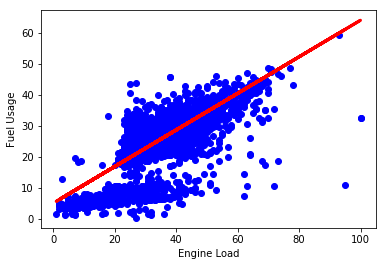

In [121]:
from sklearn import linear_model
import numpy as np

X = np.matrix(merged_df['EngineLoad'].values).T
y = np.matrix(merged_df['FuelUsage'].values).T
print(X.shape, y.shape)

regr = linear_model.LinearRegression()
regr.fit(X, y)
        
plt.scatter(X, y, color='blue')
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

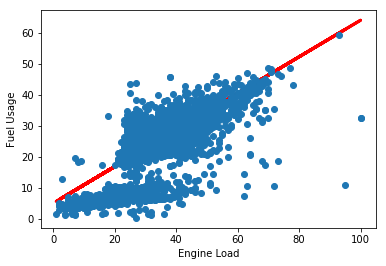

In [122]:
from scipy import stats

X = merged_df['EngineLoad']
y = merged_df['FuelUsage']

slope, intercept, i, j, k = stats.linregress(X, y)

line = slope*X + intercept
plt.plot(X, line, '-r', X, y, 'o', linewidth=3)
plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

### Polynomial (degree 2 and 3) Regression model between Engine Load and Fuel Usage

We also try two polynomials of degree 2 and 3 to see if they fit the data better than the linear regression model. However, it does not appear to do so, so we stick to linear regression later. 

         2
-0.0085 x + 1.164 x - 3.904
           3           2
5.252e-05 x - 0.01438 x + 1.357 x - 5.778


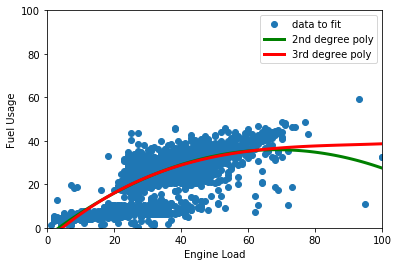

In [123]:
from numpy import *

z2 = polyfit(X.values, y, 2) 
p2 = poly1d(z2) # construct the polynomial 
print(poly1d(z2))

z3 = polyfit(X.values, y, 3)
p3 = poly1d(z3)
print(poly1d(z3))

xx = linspace(0, 100, 100)
plt.plot(X, y, 'o', xx, p2(xx),'-g', xx, p3(xx),'-r', linewidth=3)
plt.legend(['data to fit', '2nd degree poly', '3rd degree poly'])
plt.axis([0,100,0,100])
plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

## Train a neural network to learn the Engine Load-Fuel Usage correlation

We also train a neural netwrok to model the relationship. If required it can be used instead of the linear regression. 

In [124]:
import tensorflow as tf

In [125]:
x = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([1, 25]))
b = tf.Variable(tf.zeros([25]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 1])
mean_square_error = tf.reduce_mean(tf.squared_difference(y_, y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(mean_square_error)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
i = 0
for _ in range(120):
    batch_xs = np.matrix(merged_df.iloc[i:i+100]['EngineLoad'].values).T
    batch_ys = np.matrix(merged_df.iloc[i:i+100]['FuelUsage'].values).T
    i = i+100
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

### Piece-wise Linear Regression or Segmented Linear Regression

Linear regression over the entire data set does not appear to fit the data well. In particular, there are points in two different regions in [20, 70) engine-load range. So we analyze the points to see what happens in the overlap region of [20, 70). Perhaps we can use piece-wise or segmented regression to better model the data.   

### Histogram of values of Fuel Usage for Engine Load from (20, 70] 

This plot shows us that we can safely ignore the points way below the red line from (20, 70] because they are very few in number in comparison to the other points closer to the line. 

In [126]:
merged_df['EngineLoadRounded'] = merged_df['EngineLoad'].apply(lambda x: int(math.ceil(x / 10.0)) * 10)
df_p2 = merged_df.loc[operator.and_(merged_df.EngineLoad > 20.0, merged_df.EngineLoad <= 70.0)]

p2 = Histogram(df_p2, values='FuelUsage', 
               title= "Histogram of Fuel Usage Values for Engine Load from (20, 70])", 
               color='EngineLoadRounded', 
               palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
p2.legend.location='top_right'
show(p2)

### Piece-Wise Linear Regression for Engine Load-Fuel Usage Analysis

From the histogram, we have seen that the overlap is not really significant as most of the points in the engine-load [20, 70) range are for the higher value of fuel usage. So we plot one line for the values upto and including 20, and one for the values greater than 20. 

(592, 1) (592, 1)
(11906, 1) (11906, 1)


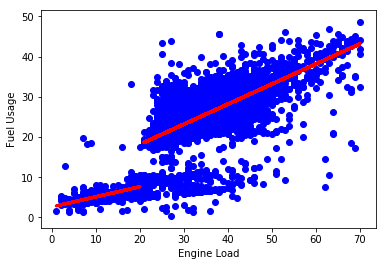

In [127]:
import operator 

df1 = merged_df.loc[merged_df['EngineLoad'] <= 20.0]

X1 = np.matrix(df1['EngineLoad'].values).T
y1 = np.matrix(df1['FuelUsage'].values).T
print(X1.shape, y1.shape)

regr = linear_model.LinearRegression()
regr.fit(X1, y1)
        
plt.scatter(X1, y1, color='blue')
plt.plot(X1, regr.predict(X1), color='red', linewidth=3)

df2 = merged_df.loc[operator.and_(merged_df.EngineLoad > 20.0, merged_df.EngineLoad <= 70.0)]

X2 = np.matrix(df2['EngineLoad'].values).T
y2 = np.matrix(df2['FuelUsage'].values).T
print(X2.shape, y2.shape)

regr = linear_model.LinearRegression()
regr.fit(X2, y2)
        
plt.scatter(X2, y2, color='blue')
plt.plot(X2, regr.predict(X2), color='red', linewidth=3)

plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

### Segmented Linear Regression based on Engine Speed (Running or Idling)

It still appears that the linear regression line does not fit the data well. So we separate the readings based on when the engine is running and when it is idle. Then we do linear regression on the two sets of data points independently. This approach works well and should be used for the final linear regression modeling. 

In [128]:
merged_run_df = merged_df.loc[merged_df['EngineSpeed'] >= 1375]
merged_run_df.head()

,DateTime,EngineLoad,FuelUsage,EngineSpeed,FuelUsageRounded,EngineLoadRounded
183,2017-02-10 11:23:00,10.0,7.95,1487.50,10,10
184,2017-02-10 11:24:00,19.0,10.30,1484.75,20,20
185,2017-02-10 11:25:00,22.0,10.30,1487.38,20,30
186,2017-02-10 11:26:00,21.0,10.45,1486.13,20,30
187,2017-02-10 11:27:00,20.0,9.95,1483.50,10,20


(11630, 1) (11630, 1)


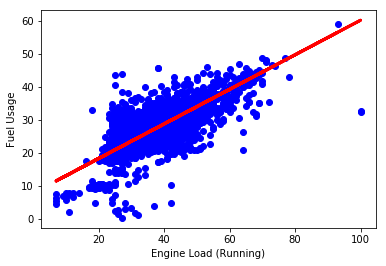

In [129]:
X2 = np.matrix(merged_run_df['EngineLoad'].values).T
y2 = np.matrix(merged_run_df['FuelUsage'].values).T
print(X2.shape, y2.shape)

regr = linear_model.LinearRegression()
regr.fit(X2, y2)
        
plt.scatter(X2, y2, color='blue')
plt.plot(X2, regr.predict(X2), color='red', linewidth=3)

plt.xlabel('Engine Load (Running)')
plt.ylabel('Fuel Usage')
plt.show()

In [130]:
merged_idle_df = merged_df.loc[merged_df['EngineSpeed'] < 1375]
merged_idle_df.head()

,DateTime,EngineLoad,FuelUsage,EngineSpeed,FuelUsageRounded,EngineLoadRounded
6,2017-02-07 12:35:00,11.0,5.55,852.50,10,20
12,2017-02-07 12:45:00,19.0,7.45,1068.75,10,20
18,2017-02-07 13:51:00,15.0,5.80,797.50,10,20
19,2017-02-07 14:19:00,11.0,5.45,850.75,10,20
20,2017-02-07 14:20:00,12.0,4.50,849.13,10,20


(882, 1) (882, 1)


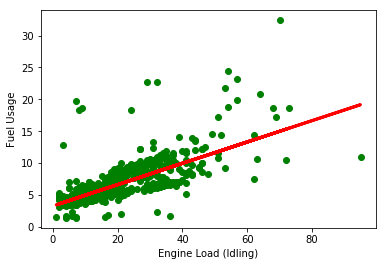

In [131]:
X3 = np.matrix(merged_idle_df['EngineLoad'].values).T
y3 = np.matrix(merged_idle_df['FuelUsage'].values).T
print(X3.shape, y3.shape)

regr = linear_model.LinearRegression()
regr.fit(X3, y3)
        
plt.scatter(X3, y3, color='green')
plt.plot(X3, regr.predict(X3), color='red', linewidth=3)

plt.xlabel('Engine Load (Idling)')
plt.ylabel('Fuel Usage')
plt.show()